In [2]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the wine dataset
wtestdata = pd.read_csv('wine_test_data.csv')
wtestlabels = pd.read_csv('wine_test_labels.csv')
wtraindata = pd.read_csv('wine_train_data.csv')
wtrainlabels = pd.read_csv('wine_train_labels.csv')
wvaldata = pd.read_csv('wine_val_data.csv')
wvallabels = pd.read_csv('wine_val_labels.csv')

In [6]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(wtraindata, wtrainlabels)
val_pred = clf.predict(wvaldata)
wvallab = list(wvallabels['class'])
print ('Validation accuracy = ' + str(np.sum(val_pred == wvallab)*1.0/len(val_pred)))

Validation accuracy = 0.974358974359


In [5]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(wtraindata, wtrainlabels)
val_pred = clf.predict(wvaldata)
wvallab = list(wvallabels['class'])
print ('Validation accuracy = ' + str(np.sum(val_pred == wvallab)*1.0/len(val_pred)))

Validation accuracy = 0.948717948718


According the accuracy of two criterions, we will use gini to train our model

In [7]:
#Using train data and validation data to training our model
X_trainframes = [wtraindata, wvaldata]
Y_trainframes = [wtrainlabels,wvallabels]
X_train = pd.concat(X_trainframes)
Y_train = pd.concat(Y_trainframes)

In [13]:
#The accuracy on the test data
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, Y_train)
test_pred = clf.predict(wtestdata)
wtestlab = list(wtestlabels['class'])
print ('Test accuracy = ' + str(np.sum(test_pred == wtestlab)*1.0/len(test_pred)))

Test accuracy = 0.769230769231


Our results showed that the accuracy on the validataion data is 95% by using Decision Tree model
on train data for entropy criterions. However, the accuracy on the validation data is 97% when using
gini criterions. According to our results we adopted gini criteerions to predict the test data. When we use trained model to predict test data, the accuracy attained 77%.

Question 5: Use the criterion selected above to train Decision Tree model on train data for min
samples split=f2,5,10,20g and report the accuracies on the validation data. Select the best
parameter and report the accuracy on the test data. (2 marks)

In [16]:
#min_sample_split=2,5,10,20
for i in (2,5,10,20):
    clf = DecisionTreeClassifier(criterion='gini', min_samples_split=i)
    clf.fit(wtraindata, wtrainlabels)
    val_pred = clf.predict(wvaldata)
    wvallab = list(wvallabels['class'])
    print ('when min_sample_split is %s' % i)
    print ('we get the Validation accuracy = ' + str(np.sum(val_pred == wvallab)*1.0/len(val_pred)))

when min_sample_split is 2
we get the Validation accuracy = 0.897435897436
when min_sample_split is 5
we get the Validation accuracy = 0.974358974359
when min_sample_split is 10
we get the Validation accuracy = 0.948717948718
when min_sample_split is 20
we get the Validation accuracy = 0.923076923077


In [17]:
#The accuracy on the test data
clf = DecisionTreeClassifier(criterion='gini', min_samples_split=5)
clf.fit(X_train, Y_train)
test_pred = clf.predict(wtestdata)
wtestlab = list(wtestlabels['class'])
print ('Test accuracy = ' + str(np.sum(test_pred == wtestlab)*1.0/len(test_pred)))

Test accuracy = 0.74358974359


When we use min_sample_split in 2,5,10, and 20,the accuracy on the validataion data is 90%, 97%,
95% and 92% respectively. Therefore, we select min_sample_split 5 as our parameters in our
model. When we use trained model to predict test data, the accuracy attained 74%.

Question 6: Use the parameters selected above (Q4 and Q5) to train Decision Tree model using the
rst 20, 40, 60, 80 and 100 samples from train data. Keep the validation set unchanged during this
analysis. Report and plot the accuracies on the validation data. (2 marks)

In [18]:
#train data using the first 20 samples
accu=pd.DataFrame(columns=['Sample','accuracy'])
for i in (20,40,60,80,100):
    data = wtraindata.head(i)
    labels = wtrainlabels.head(i)
    clf = DecisionTreeClassifier(criterion='gini', min_samples_split=5)
    clf.fit(data, labels)
    val_pred = clf.predict(wvaldata)
    accuracy = np.sum(val_pred == wvallab)*1.0/len(val_pred)
    data = pd.DataFrame({'Sample': [i],'accuracy':[accuracy]})
    accu=accu.append(data)
    wvallab = list(wvallabels['class'])
    print ('when our samples are first %s' % i)
    print ('We get validation accuracy = ' + str(np.sum(val_pred == wvallab)*1.0/len(val_pred)))

when our samples are first 20
We get validation accuracy = 0.769230769231
when our samples are first 40
We get validation accuracy = 0.769230769231
when our samples are first 60
We get validation accuracy = 0.846153846154
when our samples are first 80
We get validation accuracy = 0.948717948718
when our samples are first 100
We get validation accuracy = 0.948717948718


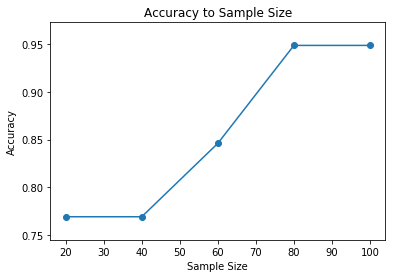

In [19]:
#plot accuracy with k value
plt.scatter(accu['Sample'], accu['accuracy'])
plt.plot(accu['Sample'], accu['accuracy'])
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')
plt.title("Accuracy to Sample Size")
plt.show()

first 20 samples


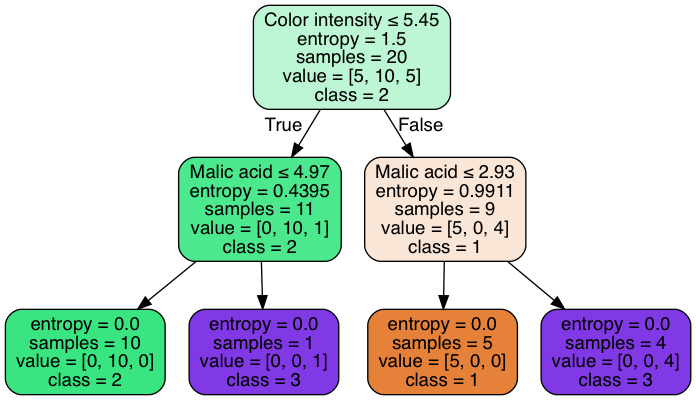

In [4]:
from IPython.display import Image 
#train data using the first 20 samples
data = wtraindata.head(20)
labels = wtrainlabels.head(20)
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=5)
clf.fit(data, labels)
dot_data = export_graphviz(clf, out_file=None, 
                        feature_names=wtraindata.columns,  
                        class_names=['1','2','3'],  
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
print('first 20 samples')
Image(graph.create_png()) 

first 40 samples


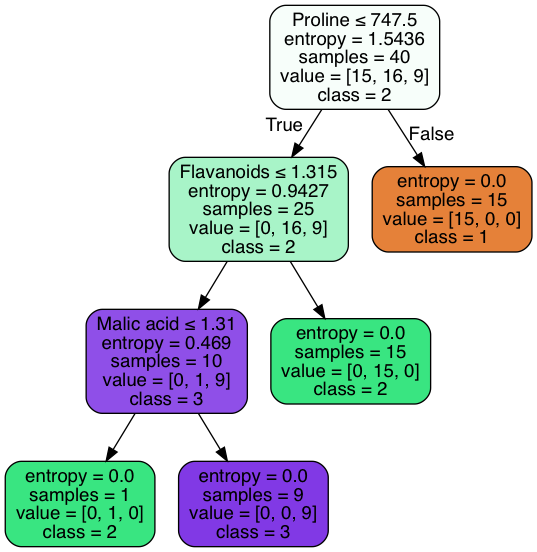

In [5]:
#train data using the first 40 samples
data = wtraindata.head(40)
labels = wtrainlabels.head(40)
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=5)
clf.fit(data, labels)
dot_data = export_graphviz(clf, out_file=None, 
                        feature_names=wtraindata.columns,  
                        class_names=['1','2','3'],  
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
print('first 40 samples')
Image(graph.create_png()) 

first 60 samples


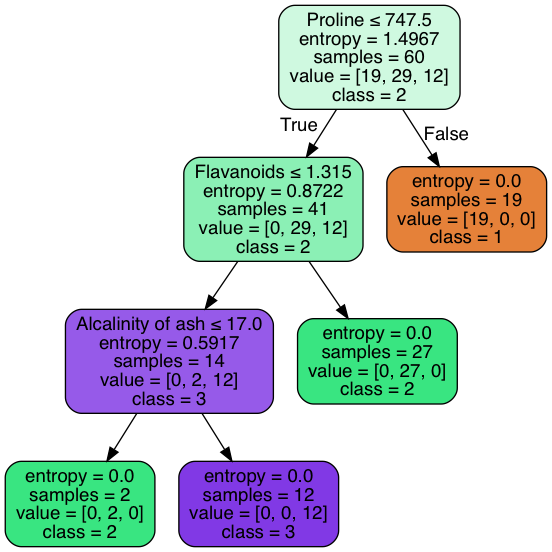

In [6]:
#train data using the first 60 samples
data = wtraindata.head(60)
labels = wtrainlabels.head(60)
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=5)
clf.fit(data, labels)
dot_data = export_graphviz(clf, out_file=None, 
                        feature_names=wtraindata.columns,  
                        class_names=['1','2','3'],  
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
print('first 60 samples')
Image(graph.create_png()) 

first 80 samples


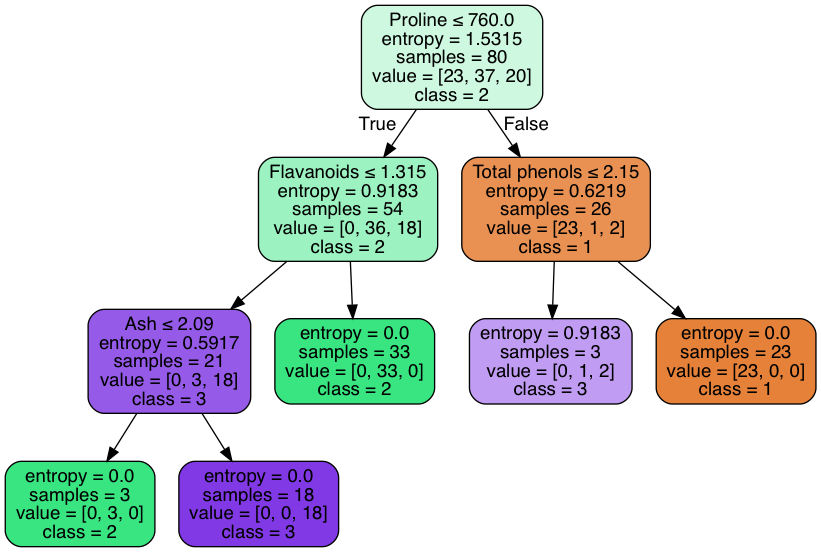

In [7]:
#train data using the first 80 samples
data = wtraindata.head(80)
labels = wtrainlabels.head(80)
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=5)
clf.fit(data, labels)
dot_data = export_graphviz(clf, out_file=None, 
                        feature_names=wtraindata.columns,  
                        class_names=['1','2','3'],  
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
print('first 80 samples')
Image(graph.create_png()) 

first 100 samples


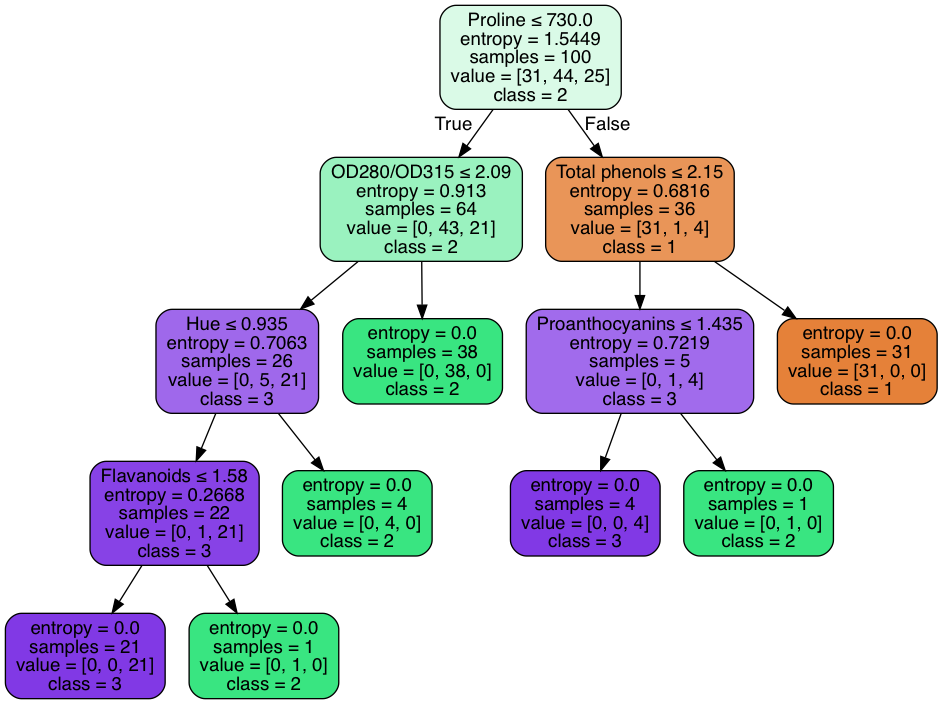

In [8]:
#train data using the first 100 samples
data = wtraindata.head(100)
labels = wtrainlabels.head(100)
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=5)
clf.fit(data, labels)
dot_data = export_graphviz(clf, out_file=None, 
                        feature_names=wtraindata.columns,  
                        class_names=['1','2','3'],  
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
print('first 100 samples')
Image(graph.create_png()) 